In [14]:
import os
import numpy as np
import sklearn
import pydicom
import matplotlib.pyplot as plt
import pickle
from keras.models import load_model
from model import *
import glob
np.random.seed(42)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [15]:
dimension = (576, 640, 1)

In [16]:
folder = "/data3/wv2019/data/PLIC_CHIESA_DICOM/"

In [17]:
model = unet(input_size=dimension)

In [18]:
model.load_weights('model_epoch19.hdf5')

In [19]:
x_ts = []
imgs = [] 
for filename in os.listdir(folder)[-10:]:
    file = pydicom.dcmread(os.path.join(folder, filename))
    if (file.pixel_array[:, :, :1].shape == dimension):                
        x_ts.append(file.pixel_array[:, :, :1])
        imgs.append(file.pixel_array)
        
x_ts = np.array(x_ts)

In [20]:
def apply_mask(img, mask):
    assert img[:, :, :1].shape == mask.shape
    img = img.astype(np.float64)
    mask[mask <= 0.38] = 0
    for i in range(img.shape[-1]):
        img[..., i] /= 255
        img[..., i] *= mask[..., 0]
    return img

In [21]:
prediction = model.predict(x_ts, batch_size=2)

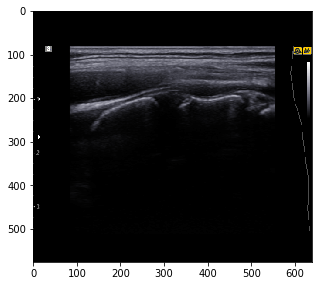

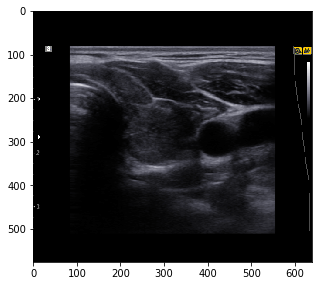

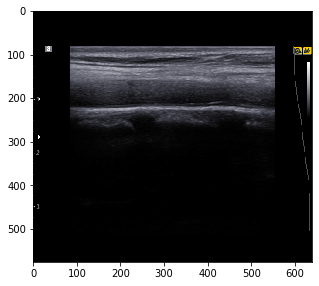

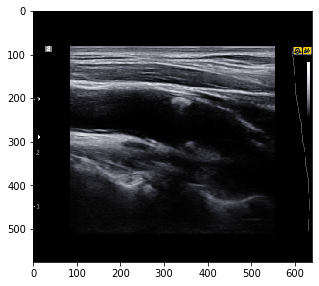

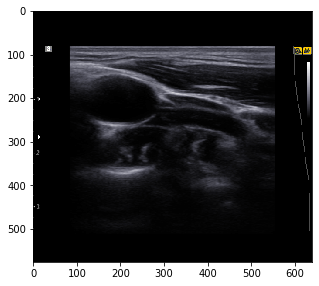

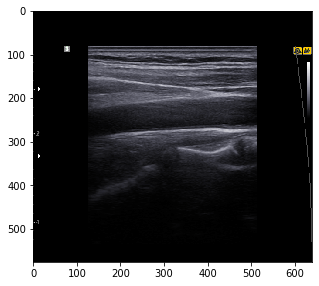

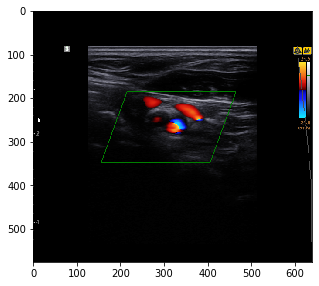

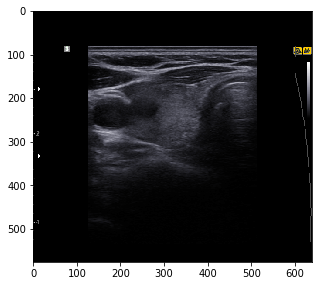

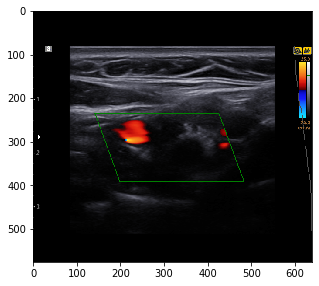

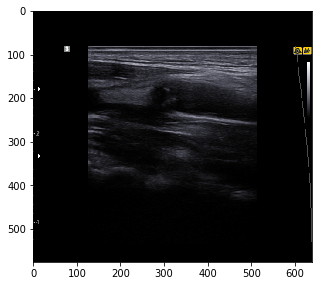

In [22]:
for i, mask in enumerate(prediction[:10]):
    masked_img = apply_mask(imgs[i], mask)
    
    plt.figure(figsize = (5, 5))

    plt.imshow(masked_img)
    plt.show()